In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data = pd.read_csv(r"C:\Users\adithya\Desktop\CGS616\recommender system\ml-100k\u.data", sep='\t' , names=["user","movie_id","rating","timestamp"])

In [4]:
user_data = pd.read_csv(r"C:\\Users\\adithya\Desktop\\CGS616\\recommender system\\ml-100k\\u.user", sep = "|" , names=["age","gender", "work","timestamp"])

In [5]:
columns  = ['movie_id','movie_title','rel_date','video_date','URL','unknown','Action','Adventure','Animation','Child','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
movie = pd.read_csv(r"C:\\Users\\adithya\Desktop\\CGS616\\recommender system\\ml-100k\\u.item", sep='|', names=columns, encoding='latin-1')

In [6]:
column = ['user_id','age','sex','profession','code']
user = pd.read_csv(r"C:\\Users\\adithya\Desktop\\CGS616\\recommender system\\ml-100k\\u.user", sep = '|', names=column, encoding='latin-1')

### exploring Data

In [65]:
user_data.head()

,age,gender,work,timestamp
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [ ]:
n_ratings = len(data)
n_movies = data['movie_id'].nunique()
n_users = data['user'].nunique()

In [7]:
data.head()

,user,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
data.isnull().sum()

user         0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [9]:
mean_ratings = data.groupby('user')['rating'].mean().sort_index()
mean_ratings

user
1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
         ...   
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Name: rating, Length: 943, dtype: float64

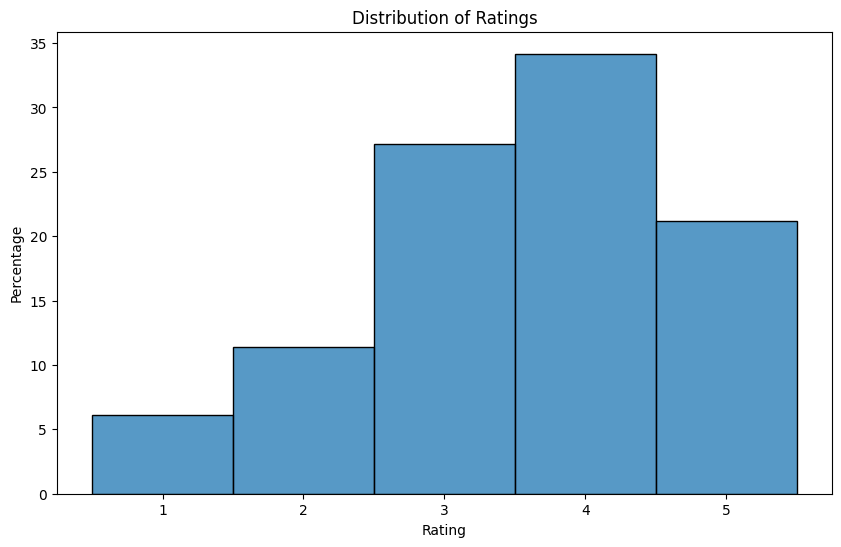

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="rating", stat="percent", discrete=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.show()

In [23]:
rating_data.head()

,rating,count
0,1,6110
1,2,11370
2,3,27145
3,4,34174
4,5,21201


In [11]:
rating_counts = data['rating'].value_counts().sort_index()

# Create a DataFrame for the rating counts
rating_data = pd.DataFrame({
    'rating': rating_counts.index,
    'count': rating_counts.values
})

# Create an interactive bar chart
fig = px.bar(rating_data, x='rating', y='count', title='Distribution of Ratings',
             labels={'rating': 'Rating', 'count': 'Count'})

# Show the plot
fig.show()

In [12]:
film = data.merge(movie, on = 'movie_id')

In [13]:
film = film[['user','movie_id','rating','movie_title']]

In [15]:
film.head()

,user,movie_id,rating,movie_title
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)


In [16]:
film['movie_title'].value_counts()[0:10]

movie_title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64

In [17]:
new = data.groupby('movie_id')[['rating']].mean()
new.head()
lowest_rated = new['rating'].idxmin()
highest_rated = new['rating'].idxmax()

### Bayesian Average

In [18]:
data.head()

,user,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [19]:
movie_stat = data.groupby('movie_id')['rating'].agg(['count','mean'])
movie_stat.head()

,count,mean
movie_id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326


In [20]:
C = movie_stat['count'].mean()
m = movie_stat['mean'].mean()

print (f'average no of rating for a given movie {C}')
print(f'average rating for a movie {m}')

average no of rating for a given movie 59.45303210463734
average rating for a movie 3.076044508325179


In [21]:
def bayesain(ratings):
    bayes = (C*m + ratings.sum()) / (C + ratings.count())
    return round(bayes,3)

In [22]:
x = pd.Series([5,5])
bayesain(x)

3.139

In [23]:
bayes = data.groupby('movie_id')['rating'].agg(bayesain).reset_index()
bayes.columns = ['movie_id','bayesian_rating']

In [24]:
movies1 = movie_stat.merge(bayes,on = 'movie_id')
movies1

,movie_id,count,mean,bayesian_rating
0,1,452,3.878319,3.785
1,2,131,3.206107,3.166
2,3,90,3.033333,3.050
3,4,209,3.550239,3.445
4,5,86,3.302326,3.210
...,...,...,...,...
1677,1678,1,1.000000,3.042
1678,1679,1,3.000000,3.075
1679,1680,1,2.000000,3.058
1680,1681,1,3.000000,3.075


In [25]:
movies1 = movies1.merge(film, on = 'movie_id')
movies1.head()

,movie_id,count,mean,bayesian_rating,user,rating,movie_title
0,1,452,3.878319,3.785,308,4,Toy Story (1995)
1,1,452,3.878319,3.785,287,5,Toy Story (1995)
2,1,452,3.878319,3.785,148,4,Toy Story (1995)
3,1,452,3.878319,3.785,280,4,Toy Story (1995)
4,1,452,3.878319,3.785,66,3,Toy Story (1995)


In [46]:
movi = movie.drop(columns=['movie_id','movie_title','rel_date','video_date','URL','unknown'], axis = 1)

In [51]:
movi.head()

,Action,Adventure,Animation,Child,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [53]:
movit = movi.T

In [60]:
movit = pd.DataFrame(movit['Total']).reset_index()

In [66]:
movit.head()

,Genre,Total
0,Action,251
1,Adventure,135
2,Animation,42
3,Child,122
4,Comedy,505


In [62]:
movit.columns = ['Genre','Total']

In [64]:
fig = px.bar(movit, x = 'Genre', y ='Total', title='Genre VS Count')
fig.show()